In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
beml_df = pd.read_csv("BEML.csv")
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [4]:
glaxo_df = pd.read_csv("GLAXO.csv")
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [5]:
#slicing by having only the neccessary columns- Date and Close
beml_df = beml_df[['Date','Close']] 
glaxo_df = glaxo_df[['Date','Close']]

In [6]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [7]:
glaxo_df

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


In [8]:
#in order to identify the rows uniquely by the respective date, we change 'Date' column as index column by set_index
#Date column is of type object so to convert that into datetime type, we use DatetimeIndex here.
'''The DataFrames have a date column, so we can create a DatetimeIndex index from this column Date. 
It will ensure that the rows are sorted by time in ascending order.'''
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))

In [9]:
beml_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05
...,...,...
2016-12-26,2016-12-26,950.25
2016-12-27,2016-12-27,975.70
2016-12-28,2016-12-28,974.40


In [10]:
glaxo_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80
...,...,...
2016-12-26,2016-12-26,2723.50
2016-12-27,2016-12-27,2701.75
2016-12-28,2016-12-28,2702.15


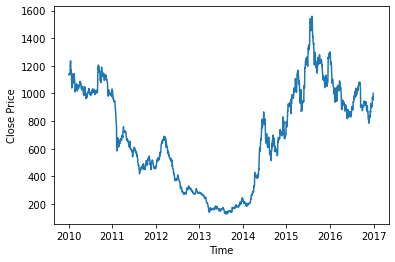

In [11]:
#lineplot for close price Vs time for BEML data
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

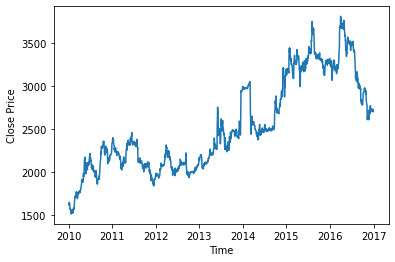

In [12]:
#lineplot for close price Vs time for GLAXO data
plt.plot(glaxo_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

#### From the above lineplots, it can be said that GLAXO has less varaitions than that of BEML. Like, over a period of time we can see an increase in the GLAXO plot but it not so in BEML. Hence, people can't rely on BEML.

In [13]:
beml_df['gain'] = beml_df.Close.pct_change(periods=1) #periods=1-> immediate previous day considered
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods=1)

In [14]:
beml_df

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1135.60,NaN
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
...,...,...,...
2016-12-26,2016-12-26,950.25,-0.021924
2016-12-27,2016-12-27,975.70,0.026782
2016-12-28,2016-12-28,974.40,-0.001332


In [15]:
glaxo_df

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


In [16]:
#drop first row, since it is NaN
beml_df = beml_df.dropna()
glaxo_df = glaxo_df.dropna()

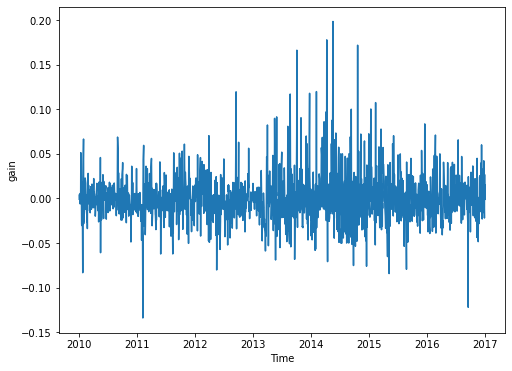

In [17]:
#lineplot for gain column for BEML data
plt.figure(figsize=(8,6));
plt.plot(beml_df.index,beml_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');

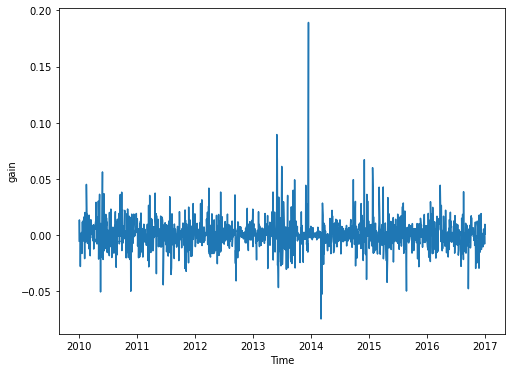

In [18]:
#lineplot for gain column for GLAXO data
plt.figure(figsize=(8,6));
plt.plot(glaxo_df.index,glaxo_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');

#### From the above lineplots for gain, we can see that there are more fluctuations in the negative side(means loss) for BEML and less fluctuations on the negative side for GLAXO. Hence, from this plot too, we can conclude that investing in GLAXO is reliable.

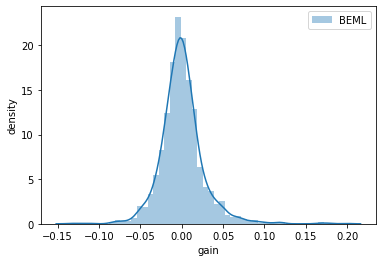

In [19]:
#distplot(histogram+density plot) for BEML
sn.distplot(beml_df.gain, label='BEML');
plt.xlabel('gain');
plt.ylabel('density');
plt.legend();

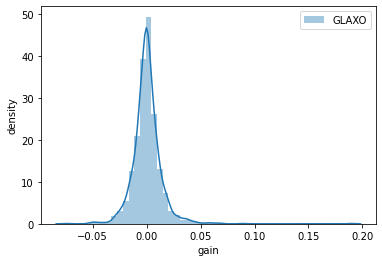

In [20]:
#distplot for GLAXO
sn.distplot(glaxo_df.gain, label='GLAXO');
plt.xlabel('gain');
plt.ylabel('density');
plt.legend();

#### From the above distplots, we can observe that BEML has a flat peak which reaches more or less to 23 units, whereas GLAXO has a sharp peak which reaches to approximately 50 units. Flat peak(BEML) indicates negative kurtosis, which has high variance. Sharp peak (GLAXO) indicates positive kurtosis, which has less variance.


## Therefore from the above 3 plots, we can conclude that BEML has higher risk volatility due to its high fluctuations in price changes than GLAXO. So, investing in GLAXO is reliable.

## Performing some calculations and normal distribution on the datasets

In [21]:
#mean & std dev. for BEML
print('Mean:' , round(beml_df.gain.mean(), 4))
print('Standard deviation:' , round(beml_df.gain.std(), 4))

Mean: 0.0003
Standard deviation: 0.0264


In [22]:
#mean & std dev. for GLAXO
print('Mean:' , round(glaxo_df.gain.mean(), 4))
print('Standard deviation:' , round(glaxo_df.gain.std(), 4))

Mean: 0.0004
Standard deviation: 0.0134


#### From the above respective mean values for BEML and GLAXO, we can conclude that the expected daily returns of both the stocks is zero.

#### And GLAXO has less std. dev. value compared to BEML , means less variance means  less fluctuations. Hence, this also tells us that investing in GLAXO is better that BEML.

In [23]:
from scipy import stats
#probabilty of making 2% loss or higher in BEML (that is left side of the mean)
stats.norm.cdf(-0.02, loc=beml_df.gain.mean(), scale=beml_df.gain.std()) #here 2% loss means x=-0.02
#instead of gain.mean() and gain.std(), we can aslo substitute the above respective mean and std dev. values

0.22155987503755292

In [24]:
#probabilty of making 2% profit or higher in BEML (that is right side of the mean)
1 - stats.norm.cdf(0.02, loc=beml_df.gain.mean(), scale=beml_df.gain.std()) #here 2% profit means x=0.02

0.22769829484075343

In [25]:
#probabilty of making 2% loss or higher in GLAXO
stats.norm.cdf(-0.02, loc=glaxo_df.gain.mean(), scale=glaxo_df.gain.std())

0.06352488667177397

In [26]:
#probabilty of making 2% profit or higher in GLAXO
1 - stats.norm.cdf(0.02, loc=glaxo_df.gain.mean(), scale=glaxo_df.gain.std()) 

0.07104511457618568